In [10]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
#from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)


In [2]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [3]:
print("train_set_x_orig.shape : " + str(train_set_x_orig.shape))
print("train_set_y_orig.shape : " + str(train_set_y_orig.shape))
print("test_set_x_orig.shape : " + str(test_set_x_orig.shape))
print("test_set_y_orig.shape : " + str(test_set_y_orig.shape))
print("Train Set Num : " + str(train_set_x_orig.shape[0]))
print("Test Set Num : " + str(test_set_x_orig.shape[0]))

train_set_x_orig.shape : (1080, 64, 64, 3)
train_set_y_orig.shape : (1, 1080)
test_set_x_orig.shape : (120, 64, 64, 3)
test_set_y_orig.shape : (1, 120)
Train Set Num : 1080
Test Set Num : 120


In [4]:
X_train = train_set_x_orig / 255
X_test = test_set_x_orig / 255

#print(test_set_y_orig)
#print(test_set_y_orig.reshape(-1))
print(train_set_y_orig)
#print(train_set_y_orig.reshape(-1))

Y_train = convert_to_one_hot(train_set_y_orig, 6).T
Y_test = convert_to_one_hot(test_set_y_orig, 6).T
 
#print(Y_test)
print(Y_train)

#print(Y_test)
#for i in range(10):
    
 #   print(Y_test[i])

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

conv_layers = {}

[[5 0 2 ... 2 4 5]]
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
b = np.array([0,0,0,5,1])
a = convert_to_one_hot(b,6).T
print(a)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


In [6]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    
    return X,Y

In [7]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [8]:
def initialize_parameters():
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [4,4,3,8],initializer = tf.contrib.layers.xavier_initializer(seed = 0))
     
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    parameters = {
        
        "W1" : W1,
        "W2" : W2
    }
    
    return parameters  

In [9]:
tf.reset_default_graph()
with tf.Session() as sess:
    
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


In [10]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = "SAME")  # padding with 0 
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding = "SAME")
    
    Z2 = tf.nn.conv2d(P1, W2, strides = [1, 1, 1, 1], padding = "SAME")
    A2 = tf.nn.relu(Z2)
    P2= tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding = "SAME")
    
    P = tf.contrib.layers.flatten(P2)
    
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn = None)
    
    return Z3

In [11]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))


Instructions for updating:
Use keras.layers.flatten instead.
Z3 = [[ 1.4416984  -0.24909666  5.450499   -0.2618962  -0.20669907  1.3654671 ]
 [ 1.4070846  -0.02573211  5.08928    -0.48669922 -0.40940708  1.2624859 ]]


In [12]:
def compute_cost(Z3, Y):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    
    return cost

In [14]:
def model(X_train, Y_train, X_test, Y_test, 
          learning_rate = 0.009, num_epochs = 100, minibatch_size = 64, print_cost = True):
   
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    
    [m, n_H0, n_W0, n_C0] = X_train.shape
    n_y = Y_train.shape[1]
    costs = []
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 :" + str(Z3))
    
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    
    
    with tf.Session() as sess:
        
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            minibatch_cost = 0
            num_minibatchs = int(m / minibatch_size)
            seed = seed + 1
            minibatchs = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatchs:
                
                (minibatch_X, minibatch_Y) = minibatch
                
                _, temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost = minibatch_cost + temp_cost / num_minibatchs
                
            if print_cost == True and epoch % 5 == 0:
                
                print("Cost after epoch %i : %f "% (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
    
        plt.plot(np.squeeze(costs))
        plt.ylabel("Cost")
        plt.xlabel("iterations (per tens)")
        plt.title("Lerning rate : " + str(learning_rate))
        plt.show()

    
        predict_ops = tf.arg_max(Z3,1)  # 返回一行中最大数值的下标
    
        correct_prediction = tf.equal(predict_ops, tf.arg_max(Y, 1))
    
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
    
        #train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        #test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        
        train_accuracy = sess.run(accuracy, feed_dict = {X: X_train, Y: Y_train})
        test_accuracy = sess.run(accuracy, feed_dict = {X: X_test, Y: Y_test})
        
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
    return train_accuracy, test_accuracy, parameters

Z3 :Tensor("fully_connected/BiasAdd:0", shape=(?, 6), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0 : 1.921332 
Cost after epoch 5 : 1.904156 
Cost after epoch 10 : 1.904309 
Cost after epoch 15 : 1.904477 
Cost after epoch 20 : 1.901876 
Cost after epoch 25 : 1.784077 
Cost after epoch 30 : 1.681052 
Cost after epoch 35 : 1.618207 
Cost after epoch 40 : 1.597972 
Cost after epoch 45 : 1.566707 
Cost after epoch 50 : 1.554486 
Cost after epoch 55 : 1.502187 
Cost after epoch 60 : 1.461035 
Cost after epoch 65 : 1.304477 
Cost after epoch 70 : 1.201501 
Cost after epoch 75 : 1.144230 
Cost after epoch 80 : 1.098368 
Cost after epoch 85 : 1.077411 
Cost after epoch 90 : 1.043173 
Cost after epoch 95 : 1.022620 


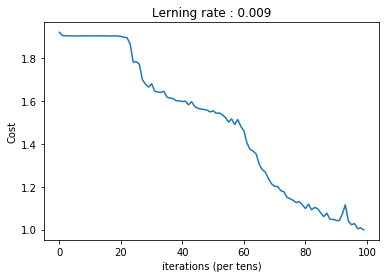

Instructions for updating:
Use `tf.math.argmax` instead
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.6638889
Test Accuracy: 0.55


In [15]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)